# Advertising Sales Channel Prediction Problem

Advertising Sales Channel Prediction Description : 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

### We have to predict the sales based on the independent columns 

#### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers, Skewness and Predicting the Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

As we have completed importing of Essesential Libraries not we will import the data and look at the data closely

In [2]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_csv('~/Desktop/Datatrained/Advertising/Advertising.csv')

Now we will look at first 5 rows of the variable using ds.head()

In [3]:
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


BY looking at the varible we can say that the varible contains all the values as float64, int64

Let us look more into the varible using ds.info() it will give us more information about the variable

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


by looking at the about table we can say that the dataset is a collection of int64 and float64 data type and in that majority of them are float64 the data has a count of 200 rows and all the rows are not null category

Now let us see what is the shape of the data by using ds.shape by using this we will understand how many columns and how many rows are there in the dataset

In [5]:
r, c = ds.shape
print("Total Number of rows are {} and columns are {}".format(r, c))

Total Number of rows are 200 and columns are 5


In above tab we can see that there are total 200 rows and 5 columns in the dataset and they are divided into 2 data types float64 and int64

Lets now look at the column names

In [6]:
ds.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

By looking at the above tab we can see the name of the columns in the dataset

now lets see if the dataset has null values or not

In [7]:
#we can check null values by using ds.isnull() and get the each row count using ds.isnull().sum()
ds.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

By looking at the above tab we can see that the dataset has no missing values now lets see Graphical representation of the same using Seaborn

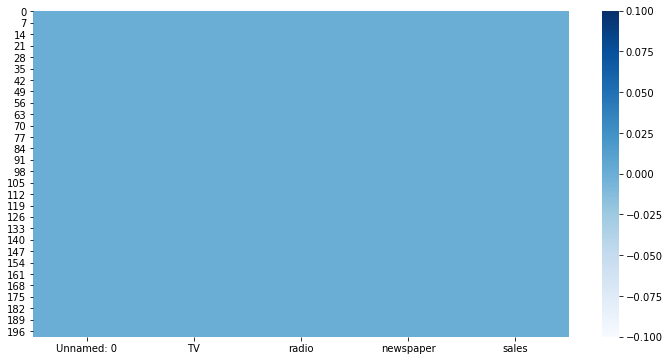

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap = 'Blues')

Here is the Graphical representaion of the dataset with no null values present in it

As there are no null values we can now see Statistical Representation of data using ds.describe()

In [9]:
ds.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


By looking at the above table we can say that there is very less outliers in the dataset lets view the statistical representation using a graph

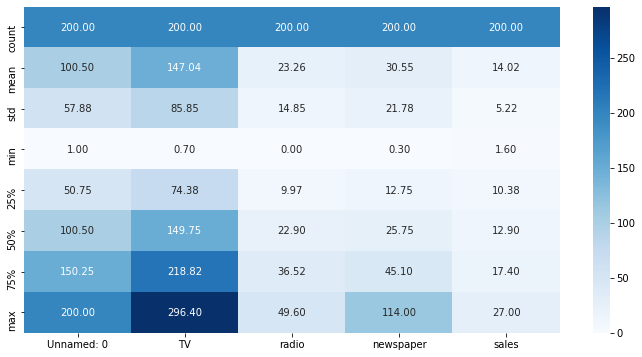

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), annot=True, cmap='Blues', fmt=".2f")

From above graph we see the same result as the stastical table with greater understanding

### Lets Start with EDA process 

In [11]:
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


By looking at the dataset we can drop the first columns Unnamed: 0 as it is unnecessary as it is giving the count of the rows 

In [12]:
ds.drop('Unnamed: 0', axis = 1, inplace=True)

In [13]:
ds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


As we have dropped the column now we have only necessay column from which we can predict the sales

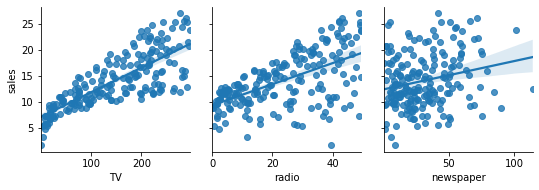

In [14]:
sns.pairplot(ds, x_vars=['TV','radio','newspaper'],y_vars='sales', kind='reg')

From above plot we are checking for Assumptions of Linearity

Lets now see the graphical representaion one by one of all the columns with Sales

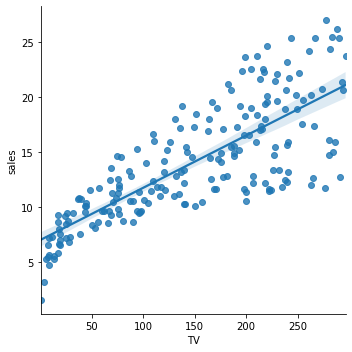

In [15]:
sns.lmplot('TV', 'sales', data = ds)

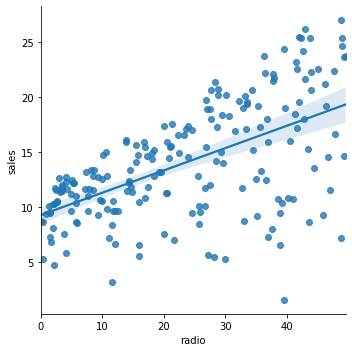

In [16]:
sns.lmplot('radio', 'sales', data = ds)

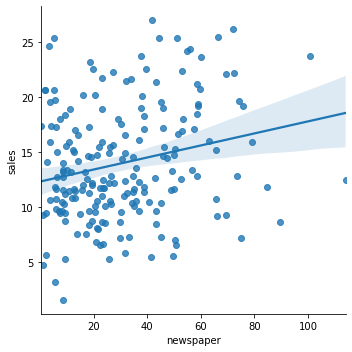

In [17]:
sns.lmplot('newspaper', 'sales', data = ds)

Now lets check the distplot for all the columns to check if there is any skewness in the data or not

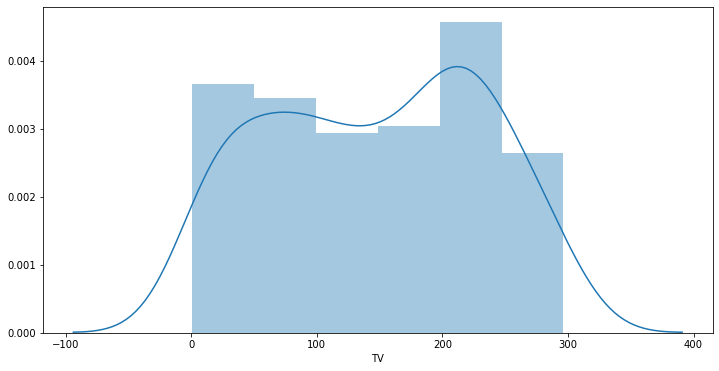

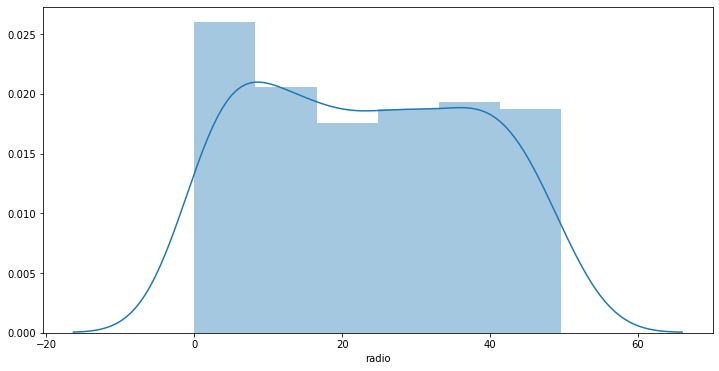

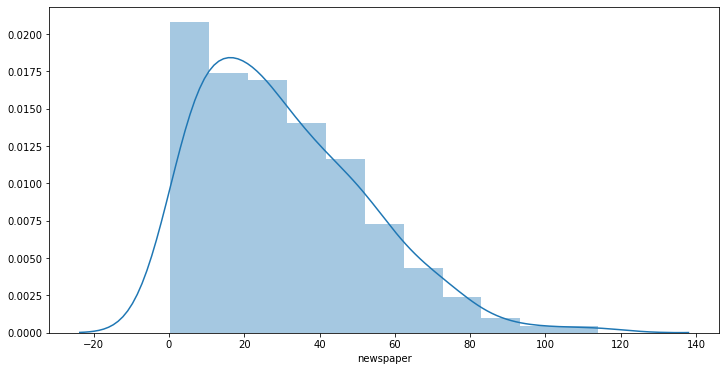

In [18]:
columns = ds.columns
columns = columns.drop('sales')
for c in columns:
    plt.figure(figsize = (12,6))
    sns.distplot(ds[c])

By looking at the density plot we can see that there is some skewness in the data we will fix it in later point of time now lets understand the data more using more graphs

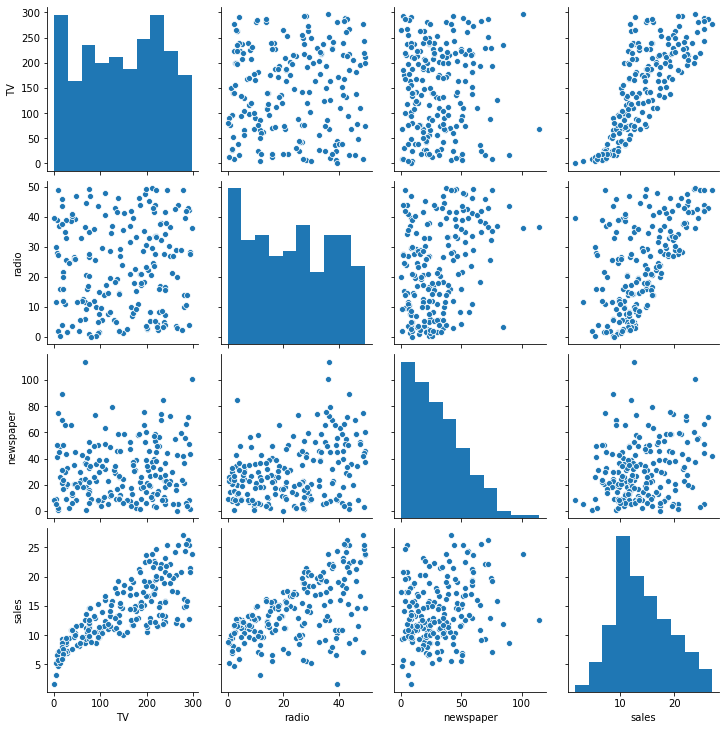

In [19]:
sns.pairplot(ds)

By looking at the above graph we can see that they has positive, Negative, neutral relation between the data

lets see the correlation of the dataset usinf ds.corr()

In [20]:
ds.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Lets see graphical representation of the correlation of the dataset

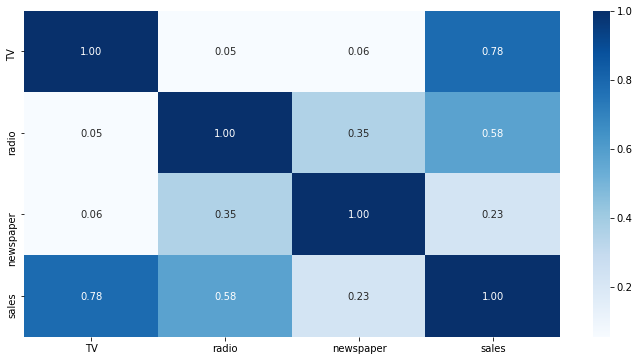

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(), annot=True, fmt='.2f', cmap = 'Blues')

We can see that most of the sales increased because of TV advertising that radio, newspaper

So we can see positive correlation between all the columns of the dataset affecting the sales

Now lets find the skewness of the data

In [22]:
#skewness can be found using ds.skew()
ds.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

We can definitely see there is some skewness in data we are taking the threshold of skewness as +/-0.5 now we will fix the skewness using power transform 'yeo-johnson' method

In [23]:
dsnew = power_transform(ds, method='yeo-johnson')

In [24]:
dsnew = pd.DataFrame(dsnew, columns = ds.columns)

In [25]:
dsnew.head()

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


As we have applied power transformation on our dataset now we will look for density plot to confirm that we have normal distribution

lets convert dsnew to our primary varible ds

In [26]:
ds = dsnew

In [27]:
ds.head()

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


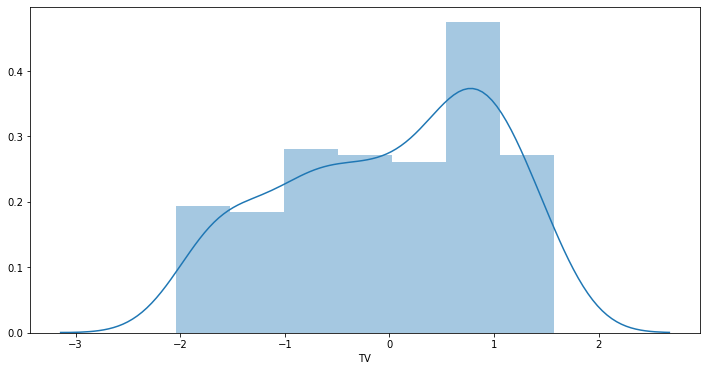

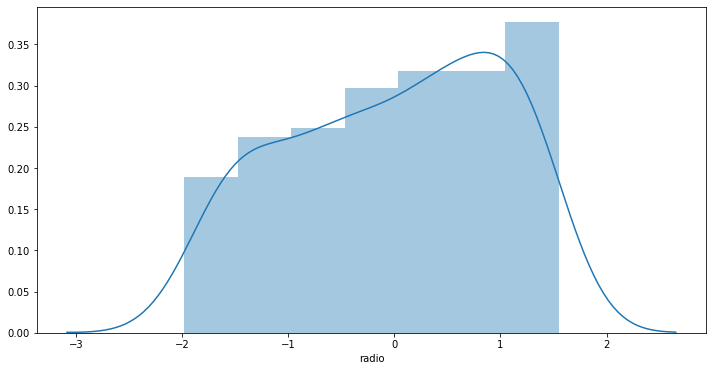

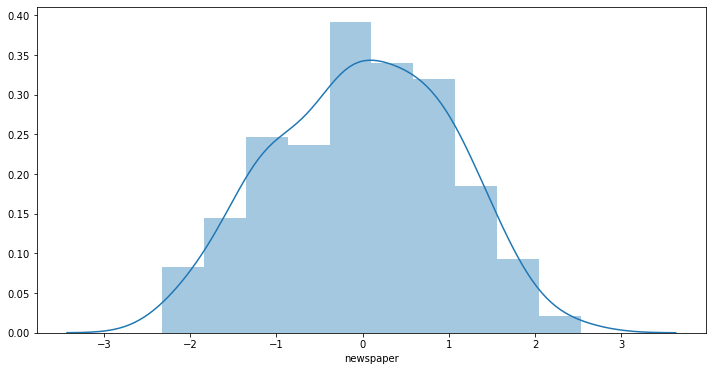

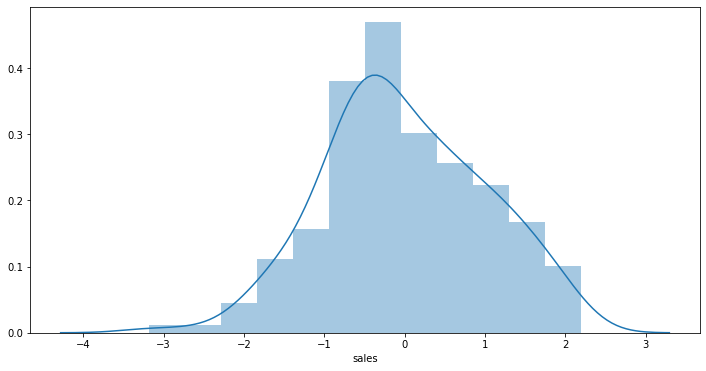

In [28]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    sns.distplot(ds[c])

From above Graph we can see that the dataset has been converted into normal distribution now we can go forward and check for outlier detection in the dataset

We will detect outliers using boxplot as if present we will remove it using zscore method

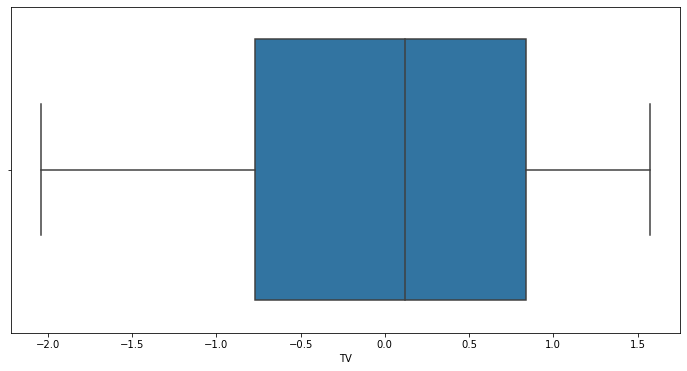

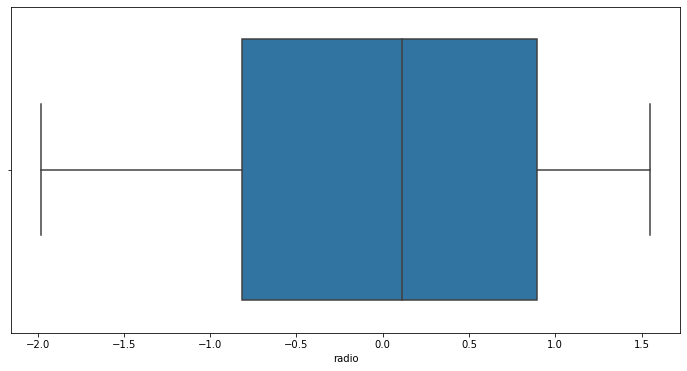

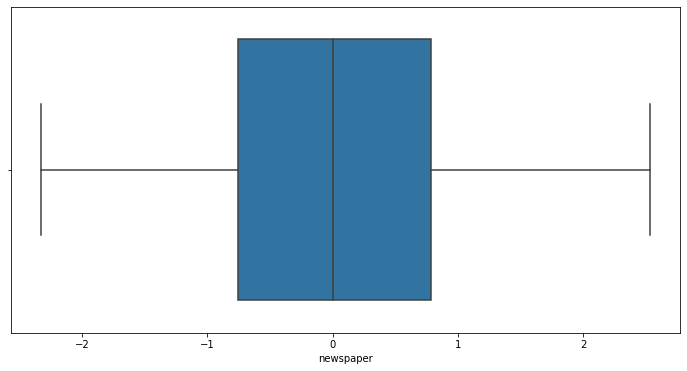

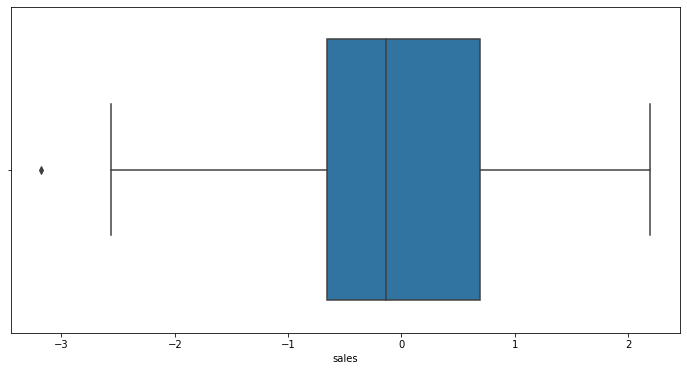

In [29]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    sns.boxplot(ds[c])

we can see that there is only one column which has outlier lets check it using zscore

In [30]:
zscr = np.abs(zscore(ds))
threshold = 3
print(np.where(zscr>3))

(array([130]), array([3]))


In [31]:
print("Old Shape:", ds.shape)

dsnew = ds[(zscr<3).all(axis=1)]

print("new shape", dsnew.shape)

Old Shape: (200, 4)
new shape (199, 4)


As we have removed the outlier and saved it in dsnew now we will check for total data loss if the data loss < 6% then we will proceed with the no outlier data

In [32]:
100-199/200*100

0.5

So here we are only lossing 0.5% of data so we can go forward with the new variable dsnew 

Now lets see the boxplot again to see if there is any more outlier or not

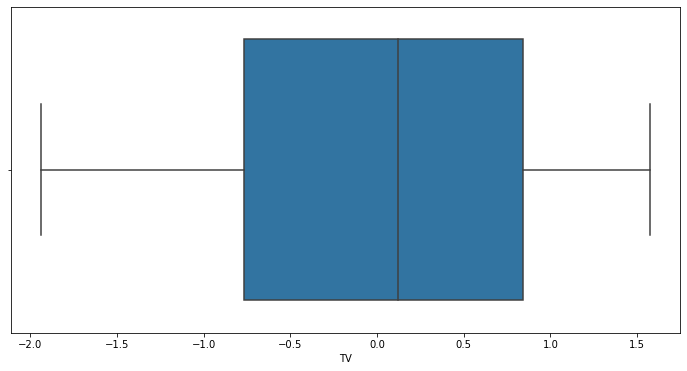

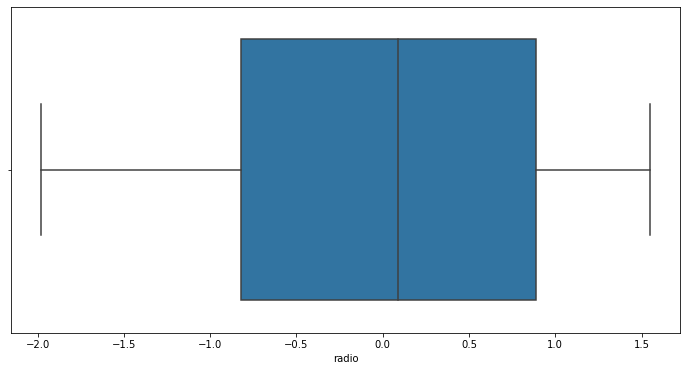

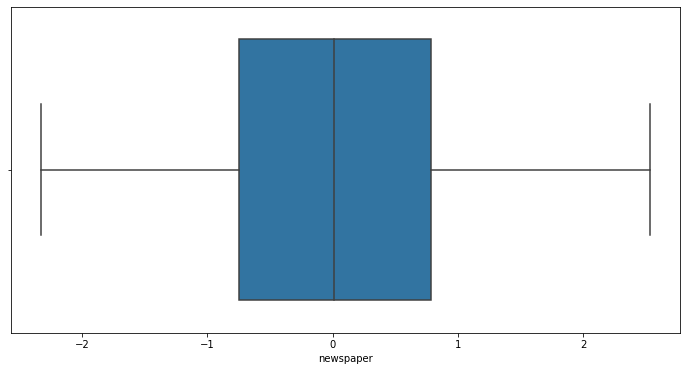

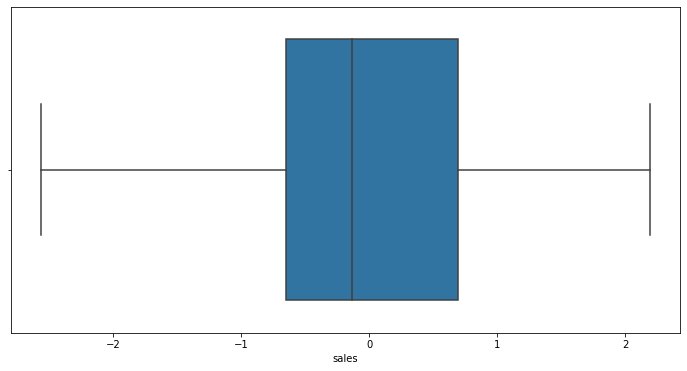

In [33]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    sns.boxplot(dsnew[c])

From above boxplot we can see that there is no outliers in the dataset and all the columns are normalized

As we have all the numeric values we will not do encoding here

### Splitting the data in Independent and Dependent Varible X and Y 

In [34]:
X = dsnew.drop('sales', axis = 1)
Y = dsnew['sales']

In [35]:
print(X.shape)
print(Y.shape)

(199, 3)
(199,)


As we have divided our X and Y varible now we will see the dataset if it has large range of values we will scale the values using min max scaler or Standard Scaler

In [36]:
X.head()

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704


As we see that there is no large value present in the dataset we will not perform Scaling

Now lets split the data in training and testing data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

here we have taken any number for random state we will find best random stste later now lets see the accuracy score at random state 42

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print(r2_score(Y_test, predlr))
print(mean_squared_error(Y_test, predlr))
print(mean_absolute_error(Y_test, predlr))

0.909602209426487
0.08072511484941866
0.2182072861638967


So here at Random State = 42 we can see a accuracy score of 91% now lets find the best random state using loop

In [40]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
print("Maximum Accuracy is {} at Random State {} for LinearRegression".format(maxacc, maxrs))

Maximum Accuracy is 0.9661290349714984 at Random State 308 for LinearRegression


We got maximum accuracy of 97% at random state 308

In [41]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, Y_train)
    pred = rfr.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for RandomForestRegressor".format(maxacc, maxrs))

Maximum Accuracy is 0.9914376590852978 at Random State 641 for RandomForestRegressor


In [42]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    dtc = RandomForestRegressor()
    dtc.fit(X_train, Y_train)
    pred = dtc.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for DecisionTreeRegressor".format(maxacc, maxrs))

Maximum Accuracy is 0.992088305305486 at Random State 438 for DecisionTreeRegressor


In [43]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    adb = AdaBoostRegressor()
    adb.fit(X_train, Y_train)
    pred = adb.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Adaboostregressor".format(maxacc, maxrs))

Maximum Accuracy is 0.9805317771430703 at Random State 50 for Adaboostregressor


In [44]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    svr = SVR()
    svr.fit(X_train, Y_train)
    pred = svr.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for SVR".format(maxacc, maxrs))

Maximum Accuracy is 0.9939819076633384 at Random State 917 for SVR


In [45]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor()]

In [46]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            
print("Maximum accuracy is {} of model {} at Random State {}".format(maxacc, m, maxrs))

Maximum accuracy is 0.9939819076633384 of model KNeighborsRegressor() at Random State 917


from above we can see that heighest accuracy is 99.39% and the model name is KNeighborsRegressor() at Random State 917

So this is the best model to solve this problem

now we will see every models best random state and do the model building accordingly

### Selecting the best model for model building 

In [47]:
print("Linear Regression")
print("Best Random State 308")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 308)
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("Accuracy Score",acclr)
print("Mean Squared Error",mean_squared_error(Y_test, predlr))
print("Mean Absolute Error",mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("Score after Cross Validation",scorelr)

Linear Regression
Best Random State 308
Accuracy Score 96.61290349714984
Mean Squared Error 0.03421452248522681
Mean Absolute Error 0.15554344924363936
Score after Cross Validation 92.18560883062506


In [48]:
print("Decision Tree Regressor")
print("Best Random State 903")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 903)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("Accuracy Score", accdtr)
print("Mean Squared Error",mean_squared_error(Y_test, predtr))
print("Mean Absolute Error",mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr, X, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("Score after Cross Validation",scoredtr)

Decision Tree Regressor
Best Random State 903
Accuracy Score 96.37251881992107
Mean Squared Error 0.04436914101488095
Mean Absolute Error 0.1483982643391766
Score after Cross Validation 94.94163514661128


In [49]:
print("Random Forest Regressor")
print("Best Random State 346")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 346)
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Accuracy Score", accrfr)
print("Mean Squared Error",mean_squared_error(Y_test, predrfr))
print("Mean Absolute Error",mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print("Score after Cross Validation",scorerfr)

Random Forest Regressor
Best Random State 346
Accuracy Score 99.08280197291413
Mean Squared Error 0.008715781454675458
Mean Absolute Error 0.07302287336327168
Score after Cross Validation 97.81030156337088


In [50]:
print("Adaboost Regressor")
print("Best Random State 50")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 50)
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print(accadb)
print("Mean Squared Error",mean_squared_error(Y_test, predadb))
print("Mean Absolute Error",mean_absolute_error(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Score after Cross Validation",scoreadb)

Adaboost Regressor
Best Random State 50
97.7595783469052
Mean Squared Error 0.01915071000743838
Mean Absolute Error 0.11432471514226007
Score after Cross Validation 95.60890196422287


In [51]:
print("SVR")
print("Best Random State 917")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 917)
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print(accsvr)
print("Mean Squared Error",mean_squared_error(Y_test, predsvr))
print("Mean Absolute Error",mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print("Score after Cross Validation",scoresvr)

SVR
Best Random State 917
99.39819076633384
Mean Squared Error 0.004372546417678209
Mean Absolute Error 0.05381488680216134
Score after Cross Validation 96.97185950441846


In [52]:
print("KNeighbours Regressor")
print("Best Random State 917")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 917)
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print(accknn)
print("Mean Squared Error",mean_squared_error(Y_test, predknn))
print("Mean Absolute Error",mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Score after Cross Validation",scoreknn)

KNeighbours Regressor
Best Random State 917
97.10243747436793
Mean Squared Error 0.02105272889262343
Mean Absolute Error 0.11603941058411796
Score after Cross Validation 94.03315420803689


As we have calculated all the Accuracy Score and Cross Validation for all the model now we will see which one has the best accuracy after the cross validation score

In [53]:
diff = {'Model Name': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Adaboost Regressor', 'SVR', 'KNeighbours Regressor'],
       'R2 Score Accuracy':[acclr, accdtr, accrfr, accadb, accsvr, accknn],
       'Cross Validation Accuracy Score':[scorelr, scoredtr, scorerfr, scoreadb, scoresvr,scoreknn],
       'R2 Score - Cross Validation Score':[acclr-scorelr, accdtr-scoredtr, accrfr-scorerfr, accadb-scoreadb, accsvr-scoresvr, accknn-scoreknn]}

In [54]:
difference = pd.DataFrame.from_dict(diff)

In [55]:
difference

,Model Name,R2 Score Accuracy,Cross Validation Accuracy Score,R2 Score - Cross Validation Score
0,Linear Regression,96.612903,92.185609,4.427295
1,Decision Tree Regressor,96.372519,94.941635,1.430884
2,Random Forest Regressor,99.082802,97.810302,1.272500
3,Adaboost Regressor,97.759578,95.608902,2.150676
4,SVR,99.398191,96.971860,2.426331
5,KNeighbours Regressor,97.102437,94.033154,3.069283


From above Dataframe we can see that Random Forest has the best accuracy score after cross validation so now we will be using Hyper Parameter Tuning for Random Forest Regressor and Further increase the accuracy score of the model

In [56]:
parameters = {'n_estimators':[100,200,300],
              'criterion':['mse','mae'],
              'max_depth':[10,20,30],
              'n_jobs':[10,20,30]
             }

In [57]:
GSCV = GridSearchCV(rfr, parameters)

In [58]:
GSCV.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [10, 20, 30]})

In [59]:
GSCV_predict = GSCV.best_estimator_.predict(X_test)

In [60]:
print("R2 Score", r2_score(Y_test, GSCV_predict)*100)
print("Mean Square Error:", mean_squared_error(Y_test, GSCV_predict))
print("Mean Absolute Error", mean_absolute_error(Y_test, GSCV_predict))

R2 Score 97.47824092148916
Mean Square Error: 0.018322265608684288
Mean Absolute Error 0.10174137567658083


From above we can see that we have increased the accuracy score of RandomForestRegressor 

We are getting 97% accuracy by using RandomForestRegressor

Lets save this model as Adveritsingsales.pkl for further deployment

In [61]:
joblib.dump(GSCV.best_estimator_, 'AdvertisingSales.pkl')

['AdvertisingSales.pkl']

now lets see predicted value and Y_test value side by side

In [62]:
predict = {'Y_test':Y_test,
          'GSCV_predict':GSCV_predict}

In [63]:
predict = pd.DataFrame.from_dict(predict)

In [64]:
predict

,Y_test,GSCV_predict
58,1.724306,1.685492
0,1.464412,1.425532
109,1.098045,0.806125
134,-0.564777,-0.513369
43,-0.134550,-0.184615
40,0.555016,0.462205
138,-0.826879,-0.612264
60,-1.174974,-1.090122
16,-0.214013,-0.198011
25,-0.314912,-0.315363


IN the above dataframe we can see the original and the predicted value for the sales